In [4]:
import mne
import matplotlib.pyplot as plt

mne_data_path = '../data/epochs/'

# Events constants
# Groups: 0-remembered; 2-not remembered; 3-novel_tnt; 4-novel_overall

EV_REMEMBERED = 0  # In leaning phase, and remembered
EV_NOT_REMEMBERED = 1  # In learning phase, not remembered
EV_NOVEL_TNT = 2  # Not in learning phase, but shown in TNT
EV_NOVEL_NEW = 3  # Never seen before
EV_NOVEL_RSVP = 4  # seen only in RSVP experiment
EVENTS = dict(EV_REMEMBERED=EV_REMEMBERED, EV_NOT_REMEMBERED=EV_NOT_REMEMBERED,
              EV_NOVEL_TNT=EV_NOVEL_TNT, EV_NOVEL_NEW=EV_NOVEL_NEW,
              EV_NOVEL_RSVP=EV_NOVEL_RSVP)


In [1]:
def load_pids(pids):
	"""
    Loads epochs after rejection for all participants specified in pids (list) or for a specified participant (int)
    """
	if type(pids) == list:
		epochs = []
		for pid in pids:
			epochs.append(mne.read_epochs('%spid%s_epochs_after_rejection-epo.fif' % (mne_data_path, pid)))
		epochs = mne.concatenate_epochs(epochs_list=epochs, add_offset=True)
	else:
		epochs = mne.read_epochs('%spid%s_epochs_after_rejection.fif-epo' % (mne_data_path, pids))
	return epochs

In [5]:
pids = [101, 103, 104]  # list
epochs = load_pids(pids)
epochs.event_id = EVENTS
evokes = dict(EV_REMEMBERED = list(epochs['EV_REMEMBERED'].iter_evoked()),
              EV_NOT_REMEMBERED = list(epochs['EV_NOT_REMEMBERED'].iter_evoked()),
              EV_NOVEL_TNT = list(epochs['EV_NOVEL_TNT'].iter_evoked()),
              EV_NOVEL_NEW = list(epochs['EV_NOVEL_NEW'].iter_evoked()),
              EV_NOVEL_RSVP = list(epochs['EV_NOVEL_RSVP'].iter_evoked())
              )
evokes = {event: event_list for event, event_list in evokes.items() if event_list}

Reading /home/michaelcs/documents/ce901-ForgettingMomery/src/../data/epochs/pid101_epochs_after_rejection-epo.fif ...
    Found the data of interest:
        t =    -200.20 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1752 matching events found
No baseline correction applied
0 projection items activated
Reading /home/michaelcs/documents/ce901-ForgettingMomery/src/../data/epochs/pid103_epochs_after_rejection-epo.fif ...
    Found the data of interest:
        t =    -200.20 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1752 matching events found
No baseline correction applied
0 projection items activated
Reading /home/michaelcs/documents/ce901-ForgettingMomery/src/../data/epochs/pid104_epochs_after_rejection-epo.fif ...
    Found the data of interest:
        t =    -200.20 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1461 matching events found
No baseline correction ap

In [ ]:
mne.viz.plot_compare_evokeds(
	evokes,
	time_unit="ms",
	axes="topo"
)

AttributeError: 'NoneType' object has no attribute '_get_renderer'

<Figure size 800x600 with 2 Axes>

[]

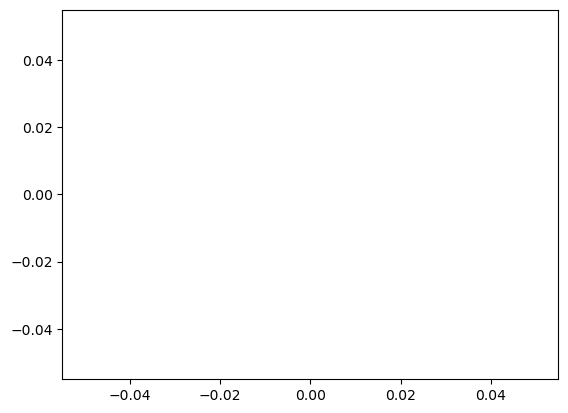

In [7]:
mne.viz.plot_compare_evokeds(evokes, combine=None, picks=['AF3'])
plt.plot()